# Proyecto 2

**Fecha de entrega:**

Último minuto del domingo 10 de noviembre

In [325]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import math
from IPython.display import display
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.stats import norm

# Ejercicio Intervalos de confianza

Ilustre la interpretación correcta de un intervalo de confianza. Hago esto construyendo intervalos de confianza para la media de una distribución $N(\mu, \sigma^2)$ en donde $\mu$ es un parámetro desconocido y $\sigma$ es conocido (lea el notebook de Pruebas de hipótesis e intervalos de confianza).

**NOTA:** Prohibido utilizar loops

Únicamente debe de utilizar sliders para:

* Tamaño de la muestra

* Número de intervalos

* Parámetro $\sigma$

* Valor verdadero de $\mu$

* Nivel de confianza

Puede guiarse del sitio

https://istats.shinyapps.io/ExploreCoverage/


**Tip**

Para verificar que su código funcione correctamente, puede utilizar lo siguiente

* Si se crean $100$ intervalos y el nivel de confianza es de $95\%$, entonces debe de ver aproximadamente $5$ intervalos que no capturan al verdadero valor de $\mu$.

In [569]:
class ConfidenceInterval:
    '''
    Clase para calcular los intervalos de confianza
    '''
    
    def __init__(self, sample_size, interval_num, confidence_level, standard_deviation, sample_mean):
        self.sample_size = sample_size
        self.interval_num = interval_num
        self.standard_deviation = standard_deviation
        self.sample_mean = sample_mean
        self.confidence_level = confidence_level 
        
    def show_frame(self):
        '''
        El método permite imprimir y mostrar los componentes como slider y botones
        '''
        sample_size_slider = widgets.IntSlider(min=0,max=1100,step=1,value=self.sample_size)
        interval_num_slider = widgets.IntSlider(min=0,max=100,step=1,value=self.interval_num)
        standard_deviation_slider = widgets.IntSlider(min=-2,max=2,step=1,value=self.standard_deviation)
        sample_mean_slider = widgets.IntSlider(min=0,max=100,step=1,value=self.sample_mean)
        confidence_level_slider = widgets.IntSlider(min=0,max=100,step=1,value=self.confidence_level)
        result_btn = widgets.Button(description='Calcular intervalos')

        sample_size_slider.observe(self.sample_size_slider_event, names='value')
        interval_num_slider.observe(self.interval_num_slider_event, names='value')
        standard_deviation_slider.observe(self.standard_deviation_slider_event, names='value')
        sample_mean_slider.observe(self.sample_mean_slider_event, names='value')
        confidence_level_slider.observe(self.confidence_level_slider_event, names='value')

        result_btn.on_click(self.btn_event)

        layout_item = widgets.Layout(display='flex',
                            flex_flow='row',
                            align_items='flex-start',
                            justify_content='space-between',
                            width='450px')
        layout_btn = widgets.Layout(display='flex',
                            flex_flow='row',
                            align_items='flex-start',
                            justify_content='space-between',
                            width='450px',
                            margin='20px auto')

        sample_size_hbox = widgets.HBox([widgets.Label('Tamaño de muestra'), sample_size_slider], layout=layout_item)
        interval_num_slider_hbox = widgets.HBox([widgets.Label('Número de intervalos'), interval_num_slider], layout=layout_item)
        standard_deviation_hbox = widgets.HBox([widgets.Label('Parámetro 𝜎'), standard_deviation_slider], layout=layout_item)
        sample_mean_hbox = widgets.HBox([widgets.Label('Valor verdadero de 𝜇'), sample_mean_slider], layout=layout_item)
        confidence_level_hbox = widgets.HBox([widgets.Label('Nivel de confianza'), confidence_level_slider], layout=layout_item)
        btn_hbox = widgets.HBox([result_btn], layout=layout_btn)

        box_container = widgets.Box(children=[sample_size_hbox,interval_num_slider_hbox,standard_deviation_hbox,sample_mean_hbox,confidence_level_hbox,btn_hbox],
                                    layout=widgets.Layout(display='flex',
                                                          flex_flow='column',
                                                          align_items='stretch',
                                                          width='100%'))
        display(box_container)

    def btn_event(self, change, info=False):
        if info:
            print('Calculando...')
            print('Sample_size: {}'.format(self.sample_size))
            print('Interval number: {}'.format(self.interval_num))
            print('Standard deviation: {}'.format(self.standard_deviation))
            print('Sample mean: {}'.format(self.sample_mean))
            print('Confidence level: {}'.format(self.confidence_level))
            print('')
            
        self.do_it(self.sample_size, self.interval_num, self.standard_deviation, 
              self.sample_mean, self.confidence_level)
        
    def do_it(self, sample_size, interval_num, standard_deviation, sample_mean_loc, confidence_level):
        np.random.seed(54321)
        
        obs = norm.rvs(size=sample_size, loc=sample_mean_loc, scale=standard_deviation)

        intervals = []
        sample_means = []

        for sample in range(0, interval_num):
            sample = np.random.choice(a=obs, size=sample_size)
            sample_mean = sample.mean()
            sample_means.append(sample_mean)

            z_critical = norm.ppf(q=(confidence_level/100))  # z-critical value
            pop_stdev = obs.std()  # standard deviation
            
            margin_of_error = z_critical * (pop_stdev/np.sqrt(sample_size))
            confidence_interval = (sample_mean-margin_of_error, sample_mean+margin_of_error)  
            intervals.append(confidence_interval)

        plt.figure(figsize=(8,10))
        plt.errorbar(y=np.arange(0, interval_num, 1), 
                     x=sample_means, 
                     xerr=[(top-bot)/2 for top,bot in intervals],
                     fmt='o',
                     color='lime')
        plt.vlines(ymin=0, ymax=interval_num,
                   x=sample_mean_loc, 
                   linewidth=0.5,
                   color='blue')

    def sample_size_slider_event(self, change):
        self.sample_size = change['new']

    def interval_num_slider_event(self, change):
        self.interval_num = change['new']

    def standard_deviation_slider_event(self, change):
        self.standard_deviation = change['new']

    def sample_mean_slider_event(self, change):
        self.sample_mean = change['new']

    def confidence_level_slider_event(self, change):
        self.confidence_level = change['new']


Box(children=(HBox(children=(Label(value='Tamaño de muestra'), IntSlider(value=1000, max=1100)), layout=Layout…

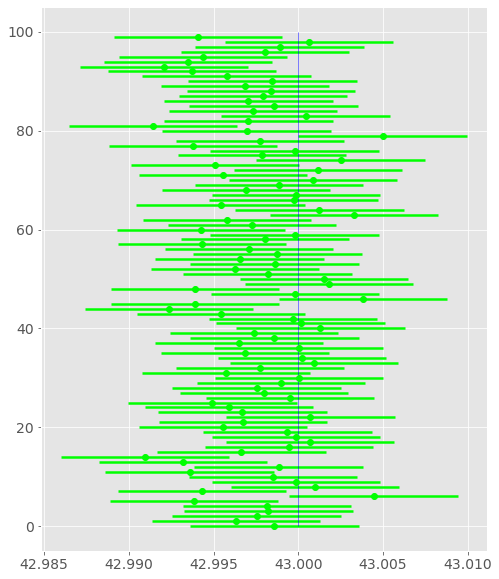

In [570]:
ci = ConfidenceInterval(1000,100,95,0.1,43)
ci.show_frame()

# Máxima verosimilitud

Utilizando la función de densidad de la distribución lognormal

$$
f(x;\mu,\sigma) = \dfrac{1}{x\sigma\sqrt{2\pi}} exp\left(-\dfrac{\left(\ln x - \mu \right)^2}{2\sigma^2}\right)
$$

Obtenga estimados de máxima verosimilitud para una muestra $x_1,\ldots,x_{100}$ con $\mu = 1$, $sigma = 2$ y compare lo obtenido con las soluciones analíticas:

$$
\widehat{\mu} = \dfrac{\sum_{i=1}^{100} \ln x_i}{100}
$$
$$
\widehat{\sigma^2} = \dfrac{\sum_{i=1}^{100} (\ln x_i - \widehat{\mu})^2}{100}
$$

Fije la semilla con np.random.seed(54321), reporte sus resultados utilizando 6 decimales. Como solución inicial $\mu = \sigma = 0.5$.

In [697]:
def loglikelihood(params, *args):
    '''
    Función para calcular el logaritmo (natural) de una función
    de densidad normal
    
    ENTRADA
    params: Numpy array con dimensión 1 y shape(n,) en donde n es el número
    de variables que se quieren optimizar
    
    *args: Tupla de parámetros fijos necesarios para definir completamente
    la función
    
    SALIDA
    Valor de logaritmo (natural) de una función de densidad normal
    '''
    data = args[0]  # The dataset x1, x2,...,xn is a realization of a random sample from an N(µ, σ2) distribution.
    mu = params[0]  # µ value
    sig = params[1] # σ value

    return -np.sum(norm.logpdf(x=data, loc=mu, scale=sig))

def do_loglikelihood(dataset, temp_lb=[-np.inf, 0], temp_ub=[np.inf, np.inf], mu=1, sig=2, n_size=100, 
                     mean_log=False, general_info=True, extra_info=True):
    '''
    Bounds:
    * µ puede tomar cualquier valor en [-np.inf, np.inf].
    * σ puede tomar cualquier valor en [0, np.inf]. El 0.00001 es para evitar.
    '''
    np.random.seed(54321)
    
    result = minimize(
        loglikelihood, 
        x0=np.array([0.5, 0.5]),#np.array([0,1]), 
        bounds=Bounds(lb=temp_lb, ub=temp_ub),
        method='L-BFGS-B', 
        args=data)
    
    if(general_info):
        print(result)
        
    if(extra_info):
        data_mean = data.mean()
        data_var = data.var(ddof = 0)
        print("")
        print("Solución analítica")
        if mean_log:
            data_log = np.array(list(map(lambda x : np.log(x), [(x**2) for x in data])))
            data_log_mean = data_log.mean()
            var_data_log = np.array(list(map(lambda x : (x-data_log_mean)**2, [(x**2) for x in data])))
            var_data_log_mean = var_data_log.mean()
        print("µ    {}".format(np.round(data_mean, 6)))
        print("σ^2  {}".format(np.round(data_var, 6)))
        print("")
        print("Solución aproximada")
        print("µ    {}".format(np.round(result.x[0], 6)))
        print("σ^2  {}".format(np.round(result.x[1]**2, 6)))
    

In [698]:
np.random.seed(54321)

n_size,mu,sig = 100,1,2
data = norm.rvs(loc=mu, scale=sig, size=n_size)

print("** Solución inicial donde Bounds => 𝜇=[-∞,∞] 𝜎=[0,∞] **", end="\n\n")
do_loglikelihood(dataset=data, temp_lb=[-np.inf, 0], temp_ub=[np.inf, np.inf], mean_log=True)
print("\n=====================================================================")
#plt.hist(data)

** Solución inicial donde Bounds => 𝜇=[-∞,∞] 𝜎=[0,∞] **

      fun: 204.87333360755184
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.84217094e-06, -1.13686838e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 10
   status: 0
  success: True
        x: array([1.44658188, 1.87722505])

Solución analítica
µ    1.446582
σ^2  3.523975

Solución aproximada
µ    1.446582
σ^2  3.523974



# Valuación de derivados

Utilizando los valores

* $S_0=100$
* $K=110$
* $T = 1$
* $r = 0.01$
* $\sigma = 0.2$
* $t = 0$

Calcule el valor de una opción call europea utilizando simulación y compare sus resultados con la fórmula analítica de Black-Scholes.

Haga una gráfica en donde el eje $x$ sea el número de simulaciones $N \in \{100, 200, \ldots, 2000 \}$ y el eje $y$ sea el precio calculado. Esta gráfica debe de mostrar convergencia al precio dado por la fórmula analítica

In [818]:
class Payoff():
    '''
    Funcions that lets you specify a few parameters and calculates the payoff
    stock = stock underlying
    strike_price = strike price
    price = premium paid for option
    '''
    
    def __init__(self, stock, strike_price, price):
        self.stock = stock
        self.strike_price = strike_price
        self.price = price
        
    def get_stock(self):
        return self.stock

    def get_strike_price(self):
        return self.strike_price
    
    def get_price(self):
        return self.price
        
    def long_call(self):
        # Long Call Payoff = max(Stock Price - Strike Price, 0)
        # If we are long a call, we would only elect to call if the current stock price is greater than
        # the strike price on our option
        return np.array(list(map(lambda k: max(k-self.strike_price, 0), self.stock)))

    def long_put(self):
        # Long Put Payoff = max(Strike Price - Stock Price, 0)
        # If we are long a call, we would only elect to call if the current stock price is less than
        # the strike price on our option
        return np.array(list(map(lambda k: max(self.strike_price-k, 0), self.stock)))
    
    def black_scholes_call(self, S, K, T, r, t, sigma):
        #S: spot price
        #K: strike price
        #T: time to maturity
        #r: interest rate
        #sigma: volatility of underlying asset
        d1 = ((np.log(S / K) + (r + 0.5*(sigma**2)) * (T-t))) / (sigma * np.sqrt(T-t))
        d2 = ((np.log(S / K) + (r - 0.5*(sigma**2)) * (T-t))) / (sigma * np.sqrt(T-t))
        return (S*norm.cdf(d1, 0.0, 1.0) - np.exp(-r * (T-t))*K*norm.cdf(d2, 0.0, 1.0))

    def print_chart(self):
        plt.style.use('ggplot')
        plt.rcParams['xtick.labelsize'] = 14
        plt.rcParams['ytick.labelsize'] = 14
        plt.rcParams['figure.titlesize'] = 18
        plt.rcParams['figure.titleweight'] = 'medium'
        plt.rcParams['lines.linewidth'] = 2.5

        fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize = (7.5, 7.5))
        fig.suptitle('Gráfica de Payoff', fontsize=20, fontweight='bold')
        fig.text(0.5, 0.02, 'Precio ($)', ha='center', fontsize=14, fontweight='bold')
        fig.text(0.02, 0.5, 'Payoff ($)', va='center', fontsize=14, fontweight='bold', rotation='vertical')
        
        plt.plot(self.get_stock(), self.long_call(), 'r')
        plt.legend(["Long Call"])
        plt.show()

In [819]:
def print_sim_chart(sim_array, price_array, price_bs_array):
    plt.style.use('ggplot')
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14
    plt.rcParams['figure.titlesize'] = 18
    plt.rcParams['figure.titleweight'] = 'medium'
    plt.rcParams['lines.linewidth'] = 2.5

    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize = (7.5, 7.5))
    fig.suptitle('Gráfica de Payoff', fontsize=20, fontweight='bold')
    fig.text(0.5, 0, 'Número de simulaciones', ha='center', fontsize=14, fontweight='bold')
    fig.text(0, 0.5, 'Precio calculado', va='center', fontsize=14, fontweight='bold', rotation='vertical')
        
    plt.plot(sim_array, price_array, 'r')
    plt.legend(["Precio"])
    plt.show()
    
def do_payoff(stock_prices = np.array([t/5 for t in range(111, 1_000)]), 
              sim_array = np.array(range(100, 2_001, 100)), S0=100, K=110, T=1, r=0.01, sig=0.2, t=0):
    np.random.seed(54321)
    
    payoff_array = []
    payoff_bs_array = []

    print("==================================")
    print("Call payoff - Call Black_Scholes", end="\n\n")
    
    for n_sim in sim_array:
        sum_payoff = 0
        sum_payoff_bs = 0
        
        for i in np.array(range(0, n_sim+1)):
            price_rand = np.random.choice(stock_prices, size=1)
            payoff = Payoff([price_rand], K, 0)
            temp01 = payoff.long_call()[0]
            temp02 = payoff.black_scholes_call(price_rand, K,T,r,t,sig)[0]
            print(str(temp01[0]) + " - " + str(temp02))
            sum_payoff += temp01
            sum_payoff_bs += temp02
        
        payoff_array.append(sum_payoff)
        payoff_bs_array.append(sum_payoff_bs)

    print_sim_chart(sim_array, np.array(payoff_array), np.array(payoff_bs_array))

Call payoff - Call Black_Scholes

594 - 595.0945182875915
651 - 652.0945182875915
27 - 29.614271196833286
97 - 98.09983119288731
151 - 152.09456192575124
79 - 80.11967650324505
275 - 276.09451828843083
457 - 458.09451828759154
256 - 257.0945182918188
712 - 713.0945182875915
523 - 524.0945182875915
237 - 238.09451830931346
510 - 511.09451828759154
640 - 641.0945182875915
611 - 612.0945182875915
140 - 141.09463512510987
39 - 40.73146173154562
192 - 193.0945194129527
653 - 654.0945182875915
543 - 544.0945182875915
446 - 447.0945182875914
648 - 649.0945182875915
830 - 831.0945182875915
204 - 205.0945186769513
270 - 271.0945182888733
783 - 784.0945182875915
79 - 80.11967650324505
671 - 672.0945182875915
375 - 376.09451828759177
200 - 201.09451884187024
371 - 372.0945182875918
840 - 841.0945182875915
319 - 320.094518287613
748 - 749.0945182875915
861 - 862.0945182875915
193 - 194.09451931747995
728 - 729.0945182875915
309 - 310.09451828764054
83 - 84.11239097369327
326 - 327.09451828760365
1

419 - 420.0945182875915
584 - 585.0945182875915
112 - 113.09593643603705
88 - 89.10613816664011
405 - 406.09451828759154
377 - 378.0945182875917
848 - 849.0945182875915
881 - 882.0945182875915
357 - 358.0945182875925
587 - 588.0945182875915
89 - 90.10517531047904
543 - 544.0945182875915
395 - 396.09451828759154
627 - 628.0945182875915
509 - 510.09451828759154
99 - 100.09897803990349
752 - 753.0945182875915
101 - 102.09826052437049
361 - 362.0945182875923
477 - 478.09451828759154
73 - 74.13633341048083
19 - 22.70927557713027
754 - 755.0945182875915
409 - 410.09451828759154
420 - 421.0945182875915
25 - 27.840337258207384
318 - 319.0945182876149
849 - 850.0945182875915
283 - 284.09451828801906
237 - 238.09451830931346
483 - 484.09451828759154
535 - 536.0945182875915
52 - 53.328022749241825
34 - 36.016405495572656
342 - 343.09451828759484
228 - 229.0945183350696
697 - 698.0945182875915
775 - 776.0945182875915
184 - 185.09452057761644
243 - 244.09451830051898
489 - 490.09451828759154
486 - 

445 - 446.0945182875914
806 - 807.0945182875915
724 - 725.0945182875915
754 - 755.0945182875915
703 - 704.0945182875915
87 - 88.10718643978504
390 - 391.09451828759154
600 - 601.0945182875915
632 - 633.0945182875915
801 - 802.0945182875915
827 - 828.0945182875915
318 - 319.0945182876149
753 - 754.0945182875915
476 - 477.09451828759154
270 - 271.0945182888733
231 - 232.09451832415914
105 - 106.09715058634505
638 - 639.0945182875915
183 - 184.09452079065426
273 - 274.09451828858556
843 - 844.0945182875915
567 - 568.0945182875915
35 - 36.95138118797591
679 - 680.0945182875915
356 - 357.0945182875926
687 - 688.0945182875915
710 - 711.0945182875915
4 - 11.65522829951486
406 - 407.0945182875915
443 - 444.0945182875914
314 - 315.09451828762394
189 - 190.09451975614138
350 - 351.09451828759325
11 - 16.439174425888922
204 - 205.0945186769513
493 - 494.09451828759154
35 - 36.95138118797591
454 - 455.09451828759154
12 - 17.18039395533036
296 - 297.0945182877356
217 - 218.0945184117328
413 - 414.0

360 - 361.09451828759234
196 - 197.09451907714148
847 - 848.0945182875915
559 - 560.0945182875915
722 - 723.0945182875915
228 - 229.0945183350696
739 - 740.0945182875915
233 - 234.09451831832473
605 - 606.0945182875915
5 - 12.292219748790494
460 - 461.09451828759154
704 - 705.0945182875915
105 - 106.09715058634505
497 - 498.09451828759154
405 - 406.09451828759154
318 - 319.0945182876149
272 - 273.0945182886734
650 - 651.0945182875915
849 - 850.0945182875915
109 - 110.0963676210521
594 - 595.0945182875915
856 - 857.0945182875915
475 - 476.09451828759154
222 - 223.0945183677345
702 - 703.0945182875915
392 - 393.09451828759154
166 - 167.0945296893525
180 - 181.09452155680955
838 - 839.0945182875915
775 - 776.0945182875915
48 - 49.41437113010137
4 - 11.65522829951486
635 - 636.0945182875915
802 - 803.0945182875915
397 - 398.09451828759154
734 - 735.0945182875915
733 - 734.0945182875915
276 - 277.0945182883628
388 - 389.0945182875916
851 - 852.0945182875915
443 - 444.0945182875914
534 - 535

371 - 372.0945182875918
412 - 413.0945182875915
734 - 735.0945182875915
680 - 681.0945182875915
556 - 557.0945182875915
6 - 12.945393955057739
23 - 26.096090044596878
196 - 197.09451907714148
140 - 141.09463512510987
779 - 780.0945182875915
433 - 434.09451828759154
142 - 143.09461597419758
760 - 761.0945182875915
823 - 824.0945182875915
780 - 781.0945182875915
655 - 656.0945182875915
89 - 90.10517531047904
476 - 477.09451828759154
152 - 153.09455818832043
356 - 357.0945182875926
243 - 244.09451830051898
291 - 292.0945182878101
523 - 524.0945182875915
554 - 555.0945182875915
744 - 745.0945182875915
767 - 768.0945182875915
612 - 613.0945182875915
641 - 642.0945182875915
293 - 294.09451828777645
759 - 760.0945182875915
520 - 521.0945182875915
823 - 824.0945182875915
757 - 758.0945182875915
557 - 558.0945182875915
533 - 534.0945182875915
69 - 70.15298128643764
292 - 293.09451828779254
432 - 433.09451828759154
352 - 353.094518287593
190 - 191.0945196314126
72 - 73.14000069749473
392 - 393.0

179 - 180.09452186135815
511 - 512.0945182875915
64 - 65.18299893794905
93 - 94.10204943262573
853 - 854.0945182875915
181 - 182.09452127829837
713 - 714.0945182875915
323 - 324.094518287607
324 - 325.0945182876058
537 - 538.0945182875915
417 - 418.09451828759154
87 - 88.10718643978504
414 - 415.09451828759154
663 - 664.0945182875915
752 - 753.0945182875915
153 - 154.09455477113454
72 - 73.14000069749473
13 - 17.934696428554645
609 - 610.0945182875915
470 - 471.09451828759154
400 - 401.09451828759154
835 - 836.0945182875915
261 - 262.09451829034845
189 - 190.09451975614138
358 - 359.09451828759245
634 - 635.0945182875915
885 - 886.0945182875915
104 - 105.09739294447859
117 - 118.09542833806134
94 - 95.10142141931271
394 - 395.0945182875916
174 - 175.09452386858226
458 - 459.09451828759154
711 - 712.0945182875915
225 - 226.09451834926296
372 - 373.0945182875918
42 - 43.60238888962428
834 - 835.0945182875915
348 - 349.09451828759353
142 - 143.09461597419758
303 - 304.09451828767203
122 -

222 - 223.0945183677345
757 - 758.0945182875915
515 - 516.0945182875915
246 - 247.0945182975716
643 - 644.0945182875915
211 - 212.09451849779435
128 - 129.0948598826651
127 - 128.094891774277
682 - 683.0945182875915
53 - 54.3101977630873
242 - 243.094518301685
825 - 826.0945182875915
783 - 784.0945182875915
376 - 377.09451828759177
433 - 434.09451828759154
520 - 521.0945182875915
589 - 590.0945182875915
889 - 890.0945182875915
460 - 461.09451828759154
365 - 366.094518287592
229 - 230.0945183311099
443 - 444.0945182875914
571 - 572.0945182875915
120 - 121.09521525372547
635 - 636.0945182875915
521 - 522.0945182875915
358 - 359.09451828759245
688 - 689.0945182875915
335 - 336.09451828759734
657 - 658.0945182875915
42 - 43.60238888962428
803 - 804.0945182875915
394 - 395.0945182875916
38 - 39.780888673572505
45 - 46.498171981991135
488 - 489.09451828759154
510 - 511.09451828759154
203 - 204.09451871286566
247 - 248.09451829674776
479 - 480.09451828759154
709 - 710.0945182875915
176 - 177.

491 - 492.09451828759154
617 - 618.0945182875915
422 - 423.09451828759154
44 - 45.5304385029403
584 - 585.0945182875915
840 - 841.0945182875915
185 - 186.09452038277504
282 - 283.0945182880566
810 - 811.0945182875915
797 - 798.0945182875915
422 - 423.09451828759154
133 - 134.09473682358058
191 - 192.0945195173196
161 - 162.0945361173329
756 - 757.0945182875915
65 - 66.17599635733366
499 - 500.09451828759154
435 - 436.0945182875915
765 - 766.0945182875915
406 - 407.0945182875915
146 - 147.09458656924494
39 - 40.73146173154562
376 - 377.09451828759177
212 - 213.09451848010863
237 - 238.09451830931346
71 - 72.14398040949145
840 - 841.0945182875915
640 - 641.0945182875915
296 - 297.0945182877356
320 - 321.0945182876113
175 - 176.0945233923142
483 - 484.09451828759154
598 - 599.0945182875915
888 - 889.0945182875915
362 - 363.0945182875922
137 - 138.09467110318718
413 - 414.0945182875915
224 - 225.09451835488767
340 - 341.09451828759546
426 - 427.0945182875915
410 - 411.0945182875915
79 - 80

628 - 629.0945182875915
830 - 831.0945182875915
255 - 256.0945182921968
883 - 884.0945182875915
760 - 761.0945182875915
14 - 18.70161622837621
827 - 828.0945182875915
23 - 26.096090044596878
33 - 35.08595047938661
847 - 848.0945182875915
213 - 214.09451846391875
532 - 533.0945182875915
786 - 787.0945182875915
107 - 108.09672495264017
117 - 118.09542833806134
490 - 491.09451828759154
703 - 704.0945182875915
704 - 705.0945182875915
512 - 513.0945182875915
74 - 75.13295483512019
803 - 804.0945182875915
197 - 198.09451901026443
527 - 528.0945182875915
123 - 124.09505185724252
496 - 497.09451828759154
36 - 37.89061728421426
851 - 852.0945182875915
873 - 874.0945182875915
637 - 638.0945182875915
363 - 364.0945182875921
607 - 608.0945182875915
591 - 592.0945182875915
541 - 542.0945182875915
724 - 725.0945182875915
410 - 411.0945182875915
41 - 42.64241029066726
313 - 314.0945182876268
175 - 176.0945233923142
459 - 460.09451828759154
111 - 112.09606774550387
92 - 93.10273368852911
540 - 541.094

798 - 799.0945182875915
338 - 339.0945182875961
111 - 112.09606774550387
696 - 697.0945182875915
345 - 346.0945182875941
846 - 847.0945182875915
490 - 491.09451828759154
113 - 114.0958161778601
445 - 446.0945182875914
325 - 326.0945182876047
727 - 728.0945182875915
646 - 647.0945182875915
505 - 506.09451828759154
197 - 198.09451901026443
97 - 98.09983119288731
199 - 200.0945188930939
164 - 165.09453192151506
697 - 698.0945182875915
446 - 447.0945182875914
217 - 218.0945184117328
801 - 802.0945182875915
44 - 45.5304385029403
174 - 175.09452386858226
576 - 577.0945182875915
692 - 693.0945182875915
581 - 582.0945182875915
793 - 794.0945182875915
210 - 211.094518517115
510 - 511.09451828759154
121 - 122.09515589827672
158 - 159.09454160716956
147 - 148.09458072097783
532 - 533.0945182875915
383 - 384.09451828759165
758 - 759.0945182875915
296 - 297.0945182877356
865 - 866.0945182875915
252 - 253.09451829354816
359 - 360.09451828759234
671 - 672.0945182875915
70 - 71.1482980986523
734 - 735

69 - 70.15298128643764
505 - 506.09451828759154
181 - 182.09452127829837
710 - 711.0945182875915
317 - 318.0945182876169
507 - 508.09451828759154
96 - 97.10031631693192
821 - 822.0945182875915
623 - 624.0945182875915
378 - 379.0945182875917
536 - 537.0945182875915
39 - 40.73146173154562
780 - 781.0945182875915
567 - 568.0945182875915
180 - 181.09452155680955
218 - 219.0945184013189
787 - 788.0945182875915
598 - 599.0945182875915
629 - 630.0945182875915
559 - 560.0945182875915
94 - 95.10142141931271
568 - 569.0945182875915
346 - 347.094518287594
815 - 816.0945182875915
233 - 234.09451831832473
344 - 345.0945182875944
126 - 127.09492663103262
815 - 816.0945182875915
782 - 783.0945182875915
851 - 852.0945182875915
297 - 298.094518287724
261 - 262.09451829034845
873 - 874.0945182875915
125 - 126.09496472670824
516 - 517.0945182875915
215 - 216.09451843552898
134 - 135.09471813377786
724 - 725.0945182875915
870 - 871.0945182875915
560 - 561.0945182875915
583 - 584.0945182875915
379 - 380.09

85 - 86.1095693996482
361 - 362.0945182875923
652 - 653.0945182875915
174 - 175.09452386858226
316 - 317.09451828761905
606 - 607.0945182875915
828 - 829.0945182875915
691 - 692.0945182875915
115 - 116.09560520719633
684 - 685.0945182875915
486 - 487.09451828759154
337 - 338.0945182875965
609 - 610.0945182875915
587 - 588.0945182875915
639 - 640.0945182875915
313 - 314.0945182876268
775 - 776.0945182875915
448 - 449.0945182875914
244 - 245.09451829945004
275 - 276.09451828843083
619 - 620.0945182875915
583 - 584.0945182875915
536 - 537.0945182875915
20 - 23.54223601145773
178 - 179.09452219438512
632 - 633.0945182875915
187 - 188.09452004158115
677 - 678.0945182875915
498 - 499.09451828759154
336 - 337.09451828759694
59 - 60.227681079706926
153 - 154.09455477113454
799 - 800.0945182875915
686 - 687.0945182875915
746 - 747.0945182875915
816 - 817.0945182875915
98 - 99.09938618901842
272 - 273.0945182886734
704 - 705.0945182875915
819 - 820.0945182875915
349 - 350.0945182875934
830 - 831

73 - 74.13633341048083
1 - 9.8451849215448
572 - 573.0945182875915
55 - 56.278369978316405
376 - 377.09451828759177
5 - 12.292219748790494
124 - 125.09500636009359
202 - 203.0945187521117
658 - 659.0945182875915
335 - 336.09451828759734
29 - 31.414968946097517
431 - 432.09451828759154
37 - 38.83386537616458
11 - 16.439174425888922
833 - 834.0945182875915
172 - 173.09452495904657
334 - 335.09451828759785
451 - 452.09451828759154
667 - 668.0945182875915
520 - 521.0945182875915
628 - 629.0945182875915
798 - 799.0945182875915
520 - 521.0945182875915
391 - 392.0945182875916
373 - 374.09451828759177
727 - 728.0945182875915
64 - 65.18299893794905
629 - 630.0945182875915
206 - 207.09451861400603
251 - 252.09451829408235
320 - 321.0945182876113
345 - 346.0945182875941
48 - 49.41437113010137
399 - 400.09451828759154
821 - 822.0945182875915
56 - 57.26419333119574
306 - 307.09451828765435
547 - 548.0945182875915
464 - 465.09451828759154
301 - 302.0945182876865
569 - 570.0945182875915
522 - 523.094

399 - 400.09451828759154
881 - 882.0945182875915
507 - 508.09451828759154
740 - 741.0945182875915
785 - 786.0945182875915
127 - 128.094891774277
79 - 80.11967650324505
198 - 199.09451894907716
692 - 693.0945182875915
247 - 248.09451829674776
307 - 308.0945182876493
90 - 91.10429105546595
480 - 481.09451828759154
711 - 712.0945182875915
230 - 231.09451832748243
277 - 278.0945182883003
403 - 404.0945182875915
326 - 327.09451828760365
559 - 560.0945182875915
643 - 644.0945182875915
616 - 617.0945182875915
369 - 370.09451828759194
557 - 558.0945182875915
799 - 800.0945182875915
119 - 120.09528010211312
623 - 624.0945182875915
483 - 484.09451828759154
506 - 507.09451828759154
805 - 806.0945182875915
240 - 241.09451830434494
437 - 438.0945182875915
183 - 184.09452079065426
486 - 487.09451828759154
448 - 449.0945182875914
10 - 15.711501820511572
782 - 783.0945182875915
565 - 566.0945182875915
171 - 172.094525581999
5 - 12.292219748790494
533 - 534.0945182875915
564 - 565.0945182875915
774 - 7

152 - 153.09455818832043
572 - 573.0945182875915
889 - 890.0945182875915
165 - 166.09453075547543
145 - 146.09459296512162
280 - 281.0945182881419
303 - 304.09451828767203
299 - 300.09451828770375
490 - 491.09451828759154
62 - 63.1987907302278
526 - 527.0945182875915
578 - 579.0945182875915
757 - 758.0945182875915
855 - 856.0945182875915
871 - 872.0945182875915
265 - 266.09451828955196
693 - 694.0945182875915
755 - 756.0945182875915
705 - 706.0945182875915
200 - 201.09451884187024
614 - 615.0945182875915
491 - 492.09451828759154
121 - 122.09515589827672
379 - 380.0945182875917
615 - 616.0945182875915
618 - 619.0945182875915
732 - 733.0945182875915
49 - 50.39030964438358
346 - 347.094518287594
319 - 320.094518287613
784 - 785.0945182875915
122 - 123.09510157392211
251 - 252.09451829408235
90 - 91.10429105546595
19 - 22.70927557713027
526 - 527.0945182875915
869 - 870.0945182875915
55 - 56.278369978316405
834 - 835.0945182875915
424 - 425.09451828759154
407 - 408.09451828759154
800 - 801

197 - 198.09451901026443
836 - 837.0945182875915
574 - 575.0945182875915
278 - 279.09451828824297
819 - 820.0945182875915
610 - 611.0945182875915
606 - 607.0945182875915
856 - 857.0945182875915
332 - 333.094518287599
785 - 786.0945182875915
369 - 370.09451828759194
179 - 180.09452186135815
209 - 210.09451853822242
614 - 615.0945182875915
580 - 581.0945182875915
554 - 555.0945182875915
204 - 205.0945186769513
354 - 355.0945182875928
768 - 769.0945182875915
513 - 514.0945182875915
505 - 506.09451828759154
883 - 884.0945182875915
712 - 713.0945182875915
595 - 596.0945182875915
649 - 650.0945182875915
879 - 880.0945182875915
550 - 551.0945182875915
62 - 63.1987907302278
592 - 593.0945182875915
15 - 19.480687864815934
363 - 364.0945182875921
96 - 97.10031631693192
416 - 417.0945182875915
790 - 791.0945182875915
635 - 636.0945182875915
644 - 645.0945182875915
733 - 734.0945182875915
483 - 484.09451828759154
140 - 141.09463512510987
748 - 749.0945182875915
263 - 264.0945182899161
223 - 224.09

141 - 142.09462512187866
687 - 688.0945182875915
488 - 489.09451828759154
105 - 106.09715058634505
486 - 487.09451828759154
747 - 748.0945182875915
375 - 376.09451828759177
680 - 681.0945182875915
562 - 563.0945182875915
175 - 176.0945233923142
227 - 228.0945183393922
82 - 83.1139902084156
42 - 43.60238888962428
564 - 565.0945182875915
705 - 706.0945182875915
606 - 607.0945182875915
118 - 119.09535094713523
355 - 356.0945182875927
228 - 229.0945183350696
657 - 658.0945182875915
324 - 325.0945182876058
784 - 785.0945182875915
135 - 136.09470103891158
882 - 883.0945182875915
811 - 812.0945182875915
233 - 234.09451831832473
362 - 363.0945182875922
736 - 737.0945182875915
626 - 627.0945182875915
394 - 395.0945182875916
552 - 553.0945182875915
873 - 874.0945182875915
303 - 304.09451828767203
508 - 509.09451828759154
574 - 575.0945182875915
566 - 567.0945182875915
442 - 443.0945182875914
604 - 605.0945182875915
283 - 284.09451828801906
597 - 598.0945182875915
35 - 36.95138118797591
755 - 756

778 - 779.0945182875915
312 - 313.09451828762974
98 - 99.09938618901842
399 - 400.09451828759154
413 - 414.0945182875915
391 - 392.0945182875916
652 - 653.0945182875915
86 - 87.10832751651714
837 - 838.0945182875915
392 - 393.09451828759154
116 - 117.09551287378046
887 - 888.0945182875915
406 - 407.0945182875915
66 - 67.16953155820396
823 - 824.0945182875915
444 - 445.0945182875914
506 - 507.09451828759154
704 - 705.0945182875915
66 - 67.16953155820396
222 - 223.0945183677345
775 - 776.0945182875915
694 - 695.0945182875915
404 - 405.09451828759154
262 - 263.094518290123
834 - 835.0945182875915
239 - 240.09451830585903
291 - 292.0945182878101
305 - 306.09451828765975
724 - 725.0945182875915
588 - 589.0945182875915
681 - 682.0945182875915
147 - 148.09458072097783
111 - 112.09606774550387
759 - 760.0945182875915
330 - 331.09451828760024
427 - 428.0945182875915
163 - 164.0945331968438
778 - 779.0945182875915
733 - 734.0945182875915
422 - 423.09451828759154
577 - 578.0945182875915
204 - 205

236 - 237.09451831128032
853 - 854.0945182875915
270 - 271.0945182888733
783 - 784.0945182875915
667 - 668.0945182875915
372 - 373.0945182875918
299 - 300.09451828770375
724 - 725.0945182875915
181 - 182.09452127829837
169 - 170.09452700840325
566 - 567.0945182875915
122 - 123.09510157392211
492 - 493.09451828759154
748 - 749.0945182875915
370 - 371.0945182875919
573 - 574.0945182875915
880 - 881.0945182875915
843 - 844.0945182875915
669 - 670.0945182875915
208 - 209.09451856128283
861 - 862.0945182875915
648 - 649.0945182875915
256 - 257.0945182918188
205 - 206.0945186440847
247 - 248.09451829674776
704 - 705.0945182875915
71 - 72.14398040949145
682 - 683.0945182875915
482 - 483.09451828759154
43 - 44.56512277776403
538 - 539.0945182875915
721 - 722.0945182875915
688 - 689.0945182875915
633 - 634.0945182875915
41 - 42.64241029066726
258 - 259.09451829115386
198 - 199.09451894907716
747 - 748.0945182875915
722 - 723.0945182875915
253 - 254.0945182930583
261 - 262.09451829034845
616 - 6

683 - 684.0945182875915
655 - 656.0945182875915
150 - 151.09456601340318
841 - 842.0945182875915
172 - 173.09452495904657
750 - 751.0945182875915
280 - 281.0945182881419
692 - 693.0945182875915
291 - 292.0945182878101
811 - 812.0945182875915
661 - 662.0945182875915
45 - 46.498171981991135
109 - 110.0963676210521
73 - 74.13633341048083
100 - 101.0986037401639
586 - 587.0945182875915
824 - 825.0945182875915
111 - 112.09606774550387
821 - 822.0945182875915
280 - 281.0945182881419
846 - 847.0945182875915
304 - 305.0945182876656
24 - 26.964312639161733
109 - 110.0963676210521
868 - 869.0945182875915
164 - 165.09453192151506
230 - 231.09451832748243
640 - 641.0945182875915
803 - 804.0945182875915
794 - 795.0945182875915
35 - 36.95138118797591
878 - 879.0945182875915
877 - 878.0945182875915
486 - 487.09451828759154
470 - 471.09451828759154
317 - 318.0945182876169
284 - 285.0945182879846
481 - 482.09451828759154
187 - 188.09452004158115
612 - 613.0945182875915
438 - 439.0945182875915
591 - 592

491 - 492.09451828759154
641 - 642.0945182875915
401 - 402.09451828759154
301 - 302.0945182876865
308 - 309.09451828764475
359 - 360.09451828759234
599 - 600.0945182875915
521 - 522.0945182875915
30 - 32.32449446053866
387 - 388.0945182875916
740 - 741.0945182875915
406 - 407.0945182875915
565 - 566.0945182875915
262 - 263.094518290123
723 - 724.0945182875915
577 - 578.0945182875915
730 - 731.0945182875915
388 - 389.0945182875916
789 - 790.0945182875915
573 - 574.0945182875915
317 - 318.0945182876169
310 - 311.0945182876366
221 - 222.09451837505657
401 - 402.09451828759154
525 - 526.0945182875915
586 - 587.0945182875915
143 - 144.09460760908715
218 - 219.0945184013189
641 - 642.0945182875915
77 - 78.12433929887227
115 - 116.09560520719633
95 - 96.10084510830839
132 - 133.09475725637765
56 - 57.26419333119574
724 - 725.0945182875915
71 - 72.14398040949145
643 - 644.0945182875915
670 - 671.0945182875915
147 - 148.09458072097783
36 - 37.89061728421426
275 - 276.09451828843083
61 - 62.2076

399 - 400.09451828759154
123 - 124.09505185724252
269 - 270.0945182889868
354 - 355.0945182875928
620 - 621.0945182875915
766 - 767.0945182875915
155 - 156.0945487901705
830 - 831.0945182875915
272 - 273.0945182886734
723 - 724.0945182875915
755 - 756.0945182875915
534 - 535.0945182875915
347 - 348.09451828759376
889 - 890.0945182875915
870 - 871.0945182875915
794 - 795.0945182875915
123 - 124.09505185724252
748 - 749.0945182875915
445 - 446.0945182875914
850 - 851.0945182875915
813 - 814.0945182875915
231 - 232.09451832415914
118 - 119.09535094713523
680 - 681.0945182875915
101 - 102.09826052437049
403 - 404.0945182875915
681 - 682.0945182875915
113 - 114.0958161778601
696 - 697.0945182875915
71 - 72.14398040949145
231 - 232.09451832415914
731 - 732.0945182875915
17 - 21.073435023145038
32 - 34.16028849200552
706 - 707.0945182875915
776 - 777.0945182875915
118 - 119.09535094713523
670 - 671.0945182875915
549 - 550.0945182875915
59 - 60.227681079706926
121 - 122.09515589827672
184 - 18

491 - 492.09451828759154
562 - 563.0945182875915
474 - 475.09451828759154
107 - 108.09672495264017
502 - 503.09451828759154
603 - 604.0945182875915
705 - 706.0945182875915
742 - 743.0945182875915
296 - 297.0945182877356
176 - 177.09452295680524
509 - 510.09451828759154
378 - 379.0945182875917
636 - 637.0945182875915
458 - 459.09451828759154
36 - 37.89061728421426
767 - 768.0945182875915
118 - 119.09535094713523
370 - 371.0945182875919
523 - 524.0945182875915
554 - 555.0945182875915
847 - 848.0945182875915
463 - 464.09451828759154
806 - 807.0945182875915
216 - 217.09451842310642
410 - 411.0945182875915
641 - 642.0945182875915
231 - 232.09451832415914
190 - 191.0945196314126
478 - 479.09451828759154
556 - 557.0945182875915
120 - 121.09521525372547
490 - 491.09451828759154
18 - 21.886194303743835
770 - 771.0945182875915
797 - 798.0945182875915
41 - 42.64241029066726
687 - 688.0945182875915
29 - 31.414968946097517
283 - 284.09451828801906
127 - 128.094891774277
746 - 747.0945182875915
647 

690 - 691.0945182875915
614 - 615.0945182875915
461 - 462.09451828759154
587 - 588.0945182875915
381 - 382.09451828759165
101 - 102.09826052437049
49 - 50.39030964438358
610 - 611.0945182875915
1 - 9.8451849215448
150 - 151.09456601340318
525 - 526.0945182875915
424 - 425.09451828759154
838 - 839.0945182875915
165 - 166.09453075547543
190 - 191.0945196314126
588 - 589.0945182875915
771 - 772.0945182875915
868 - 869.0945182875915
739 - 740.0945182875915
106 - 107.09692847949165
829 - 830.0945182875915
264 - 265.09451828972624
719 - 720.0945182875915
103 - 104.09765737239942
74 - 75.13295483512019
240 - 241.09451830434494
554 - 555.0945182875915
193 - 194.09451931747995
173 - 174.09452438943242
851 - 852.0945182875915
748 - 749.0945182875915
447 - 448.0945182875914
711 - 712.0945182875915
850 - 851.0945182875915
362 - 363.0945182875922
756 - 757.0945182875915
671 - 672.0945182875915
779 - 780.0945182875915
17 - 21.073435023145038
733 - 734.0945182875915
217 - 218.0945184117328
163 - 164.

721 - 722.0945182875915
844 - 845.0945182875915
542 - 543.0945182875915
848 - 849.0945182875915
144 - 145.09459995976465
675 - 676.0945182875915
355 - 356.0945182875927
552 - 553.0945182875915
755 - 756.0945182875915
573 - 574.0945182875915
25 - 27.840337258207384
214 - 215.0945184490976
833 - 834.0945182875915
888 - 889.0945182875915
748 - 749.0945182875915
684 - 685.0945182875915
176 - 177.09452295680524
508 - 509.09451828759154
163 - 164.0945331968438
227 - 228.0945183393922
790 - 791.0945182875915
127 - 128.094891774277
157 - 158.09454379044334
149 - 150.0945704840492
314 - 315.09451828762394
390 - 391.09451828759154
229 - 230.0945183311099
373 - 374.09451828759177
654 - 655.0945182875915
25 - 27.840337258207384
58 - 59.23892026465613
190 - 191.0945196314126
357 - 358.0945182875925
840 - 841.0945182875915
161 - 162.0945361173329
137 - 138.09467110318718
570 - 571.0945182875915
83 - 84.11239097369327
715 - 716.0945182875915
558 - 559.0945182875915
518 - 519.0945182875915
845 - 846.0

493 - 494.09451828759154
304 - 305.0945182876656
776 - 777.0945182875915
756 - 757.0945182875915
558 - 559.0945182875915
576 - 577.0945182875915
235 - 236.0945183134266
60 - 61.21728594687886
111 - 112.09606774550387
214 - 215.0945184490976
55 - 56.278369978316405
61 - 62.20767459111846
150 - 151.09456601340318
166 - 167.0945296893525
856 - 857.0945182875915
491 - 492.09451828759154
714 - 715.0945182875915
858 - 859.0945182875915
849 - 850.0945182875915
117 - 118.09542833806134
289 - 290.0945182878499
464 - 465.09451828759154
151 - 152.09456192575124
744 - 745.0945182875915
82 - 83.1139902084156
13 - 17.934696428554645
368 - 369.09451828759194
265 - 266.09451828955196
876 - 877.0945182875915
142 - 143.09461597419758
672 - 673.0945182875915
596 - 597.0945182875915
690 - 691.0945182875915
789 - 790.0945182875915
529 - 530.0945182875915
595 - 596.0945182875915
2 - 10.431348085689763
387 - 388.0945182875916
634 - 635.0945182875915
516 - 517.0945182875915
346 - 347.094518287594
378 - 379.09

80 - 81.11762059924607
484 - 485.09451828759154
876 - 877.0945182875915
856 - 857.0945182875915
603 - 604.0945182875915
172 - 173.09452495904657
58 - 59.23892026465613
171 - 172.094525581999
560 - 561.0945182875915
817 - 818.0945182875915
199 - 200.0945188930939
336 - 337.09451828759694
587 - 588.0945182875915
163 - 164.0945331968438
271 - 272.0945182887691
423 - 424.09451828759154
709 - 710.0945182875915
611 - 612.0945182875915
519 - 520.0945182875915
661 - 662.0945182875915
778 - 779.0945182875915
181 - 182.09452127829837
699 - 700.0945182875915
763 - 764.0945182875915
584 - 585.0945182875915
865 - 866.0945182875915
219 - 220.09451839178354
699 - 700.0945182875915
360 - 361.09451828759234
149 - 150.0945704840492
725 - 726.0945182875915
114 - 115.09570605000134
109 - 110.0963676210521
498 - 499.09451828759154
238 - 239.09451830751098
757 - 758.0945182875915
146 - 147.09458656924494
538 - 539.0945182875915
504 - 505.09451828759154
241 - 242.09451830295717
193 - 194.09451931747995
279 -

420 - 421.0945182875915
698 - 699.0945182875915
337 - 338.0945182875965
14 - 18.70161622837621
506 - 507.09451828759154
807 - 808.0945182875915
352 - 353.094518287593
226 - 227.09451834411112
146 - 147.09458656924494
866 - 867.0945182875915
475 - 476.09451828759154
120 - 121.09521525372547
136 - 137.09468540341885
678 - 679.0945182875915
662 - 663.0945182875915
685 - 686.0945182875915
766 - 767.0945182875915
212 - 213.09451848010863
384 - 385.0945182875916
256 - 257.0945182918188
306 - 307.09451828765435
519 - 520.0945182875915
493 - 494.09451828759154
775 - 776.0945182875915
401 - 402.09451828759154
22 - 25.23606420837892
45 - 46.498171981991135
630 - 631.0945182875915
714 - 715.0945182875915
343 - 344.09451828759455
382 - 383.09451828759165
328 - 329.0945182876019
566 - 567.0945182875915
79 - 80.11967650324505
459 - 460.09451828759154
546 - 547.0945182875915
550 - 551.0945182875915
791 - 792.0945182875915
9 - 14.997836594925843
887 - 888.0945182875915
506 - 507.09451828759154
350 - 3

248 - 249.09451829599246
92 - 93.10273368852911
820 - 821.0945182875915
44 - 45.5304385029403
758 - 759.0945182875915
257 - 258.094518291472
491 - 492.09451828759154
518 - 519.0945182875915
773 - 774.0945182875915
513 - 514.0945182875915
287 - 288.09451828789713
557 - 558.0945182875915
218 - 219.0945184013189
790 - 791.0945182875915
195 - 196.09451915023985
156 - 157.09454617838378
677 - 678.0945182875915
854 - 855.0945182875915
532 - 533.0945182875915
585 - 586.0945182875915
676 - 677.0945182875915
82 - 83.1139902084156
855 - 856.0945182875915
877 - 878.0945182875915
513 - 514.0945182875915
505 - 506.09451828759154
786 - 787.0945182875915
368 - 369.09451828759194
199 - 200.0945188930939
879 - 880.0945182875915
264 - 265.09451828972624
340 - 341.09451828759546
297 - 298.094518287724
44 - 45.5304385029403
161 - 162.0945361173329
26 - 28.723780604663546
500 - 501.09451828759154
75 - 76.12984297408053
166 - 167.0945296893525
202 - 203.0945187521117
652 - 653.0945182875915
225 - 226.094518

397 - 398.09451828759154
718 - 719.0945182875915
409 - 410.09451828759154
129 - 130.09483070536584
888 - 889.0945182875915
330 - 331.09451828760024
618 - 619.0945182875915
204 - 205.0945186769513
12 - 17.18039395533036
93 - 94.10204943262573
620 - 621.0945182875915
200 - 201.09451884187024
434 - 435.09451828759154
615 - 616.0945182875915
483 - 484.09451828759154
39 - 40.73146173154562
489 - 490.09451828759154
643 - 644.0945182875915
19 - 22.70927557713027
578 - 579.0945182875915
573 - 574.0945182875915
62 - 63.1987907302278
6 - 12.945393955057739
557 - 558.0945182875915
498 - 499.09451828759154
653 - 654.0945182875915
605 - 606.0945182875915
429 - 430.0945182875914
137 - 138.09467110318718
119 - 120.09528010211312
769 - 770.0945182875915
518 - 519.0945182875915
729 - 730.0945182875915
422 - 423.09451828759154
872 - 873.0945182875915
497 - 498.09451828759154
158 - 159.09454160716956
500 - 501.09451828759154
283 - 284.09451828801906
29 - 31.414968946097517
37 - 38.83386537616458
695 - 69

156 - 157.09454617838378
517 - 518.0945182875915
526 - 527.0945182875915
50 - 51.36797351000942
404 - 405.09451828759154
480 - 481.09451828759154
589 - 590.0945182875915
580 - 581.0945182875915
876 - 877.0945182875915
553 - 554.0945182875915
381 - 382.09451828759165
197 - 198.09451901026443
470 - 471.09451828759154
171 - 172.094525581999
671 - 672.0945182875915
495 - 496.09451828759154
195 - 196.09451915023985
518 - 519.0945182875915
553 - 554.0945182875915
863 - 864.0945182875915
770 - 771.0945182875915
30 - 32.32449446053866
710 - 711.0945182875915
753 - 754.0945182875915
718 - 719.0945182875915
435 - 436.0945182875915
521 - 522.0945182875915
194 - 195.0945192301408
792 - 793.0945182875915
196 - 197.09451907714148
95 - 96.10084510830839
443 - 444.0945182875914
760 - 761.0945182875915
731 - 732.0945182875915
853 - 854.0945182875915
724 - 725.0945182875915
112 - 113.09593643603705
166 - 167.0945296893525
537 - 538.0945182875915
195 - 196.09451915023985
654 - 655.0945182875915
878 - 879

428 - 429.0945182875914
454 - 455.09451828759154
810 - 811.0945182875915
239 - 240.09451830585903
218 - 219.0945184013189
30 - 32.32449446053866
45 - 46.498171981991135
864 - 865.0945182875915
483 - 484.09451828759154
371 - 372.0945182875918
100 - 101.0986037401639
194 - 195.0945192301408
59 - 60.227681079706926
558 - 559.0945182875915
495 - 496.09451828759154
301 - 302.0945182876865
712 - 713.0945182875915
213 - 214.09451846391875
501 - 502.09451828759154
332 - 333.094518287599
22 - 25.23606420837892
764 - 765.0945182875915
831 - 832.0945182875915
263 - 264.0945182899161
248 - 249.09451829599246
99 - 100.09897803990349
353 - 354.0945182875929
335 - 336.09451828759734
50 - 51.36797351000942
624 - 625.0945182875915
433 - 434.09451828759154
50 - 51.36797351000942
447 - 448.0945182875914
698 - 699.0945182875915
346 - 347.094518287594
390 - 391.09451828759154
147 - 148.09458072097783
159 - 160.09453961102344
41 - 42.64241029066726
744 - 745.0945182875915
619 - 620.0945182875915
576 - 577.0

642 - 643.0945182875915
861 - 862.0945182875915
862 - 863.0945182875915
506 - 507.09451828759154
757 - 758.0945182875915
138 - 139.09465802459596
698 - 699.0945182875915
216 - 217.09451842310642
112 - 113.09593643603705
599 - 600.0945182875915
197 - 198.09451901026443
240 - 241.09451830434494
402 - 403.09451828759154
136 - 137.09468540341885
47 - 48.44028056753788
655 - 656.0945182875915
750 - 751.0945182875915
517 - 518.0945182875915
666 - 667.0945182875915
680 - 681.0945182875915
726 - 727.0945182875915
541 - 542.0945182875915
796 - 797.0945182875915
113 - 114.0958161778601
260 - 261.0945182905941
744 - 745.0945182875915
215 - 216.09451843552898
233 - 234.09451831832473
495 - 496.09451828759154
434 - 435.09451828759154
683 - 684.0945182875915
331 - 332.0945182875996
752 - 753.0945182875915
641 - 642.0945182875915
104 - 105.09739294447859
595 - 596.0945182875915
71 - 72.14398040949145
455 - 456.09451828759154
781 - 782.0945182875915
35 - 36.95138118797591
663 - 664.0945182875915
590 -

20 - 23.54223601145773
182 - 183.09452102359324
554 - 555.0945182875915
756 - 757.0945182875915
2 - 10.431348085689763
160 - 161.0945377859664
308 - 309.09451828764475
139 - 140.09464606363736
724 - 725.0945182875915
103 - 104.09765737239942
413 - 414.0945182875915
620 - 621.0945182875915
87 - 88.10718643978504
192 - 193.0945194129527
204 - 205.0945186769513
324 - 325.0945182876058
250 - 251.09451829466474
153 - 154.09455477113454
194 - 195.0945192301408
465 - 466.09451828759154
692 - 693.0945182875915
562 - 563.0945182875915
619 - 620.0945182875915
605 - 606.0945182875915
64 - 65.18299893794905
728 - 729.0945182875915
797 - 798.0945182875915
691 - 692.0945182875915
67 - 68.1635649283307
93 - 94.10204943262573
243 - 244.09451830051898
747 - 748.0945182875915
792 - 793.0945182875915
420 - 421.0945182875915
649 - 650.0945182875915
749 - 750.0945182875915
543 - 544.0945182875915
796 - 797.0945182875915
309 - 310.09451828764054
114 - 115.09570605000134
799 - 800.0945182875915
690 - 691.094

29 - 31.414968946097517
192 - 193.0945194129527
48 - 49.41437113010137
257 - 258.094518291472
655 - 656.0945182875915
869 - 870.0945182875915
623 - 624.0945182875915
437 - 438.0945182875915
122 - 123.09510157392211
455 - 456.09451828759154
62 - 63.1987907302278
611 - 612.0945182875915
532 - 533.0945182875915
70 - 71.1482980986523
124 - 125.09500636009359
856 - 857.0945182875915
867 - 868.0945182875915
27 - 29.614271196833286
520 - 521.0945182875915
460 - 461.09451828759154
808 - 809.0945182875915
311 - 312.0945182876331
677 - 678.0945182875915
726 - 727.0945182875915
545 - 546.0945182875915
732 - 733.0945182875915
639 - 640.0945182875915
65 - 66.17599635733366
272 - 273.0945182886734
485 - 486.09451828759154
442 - 443.0945182875914
590 - 591.0945182875915
366 - 367.094518287592
812 - 813.0945182875915
565 - 566.0945182875915
449 - 450.0945182875914
505 - 506.09451828759154
283 - 284.09451828801906
884 - 885.0945182875915
147 - 148.09458072097783
315 - 316.0945182876214
341 - 342.094518

288 - 289.0945182878725
537 - 538.0945182875915
728 - 729.0945182875915
790 - 791.0945182875915
109 - 110.0963676210521
645 - 646.0945182875915
59 - 60.227681079706926
215 - 216.09451843552898
468 - 469.09451828759154
351 - 352.09451828759313
183 - 184.09452079065426
532 - 533.0945182875915
296 - 297.0945182877356
382 - 383.09451828759165
230 - 231.09451832748243
438 - 439.0945182875915
625 - 626.0945182875915
772 - 773.0945182875915
743 - 744.0945182875915
77 - 78.12433929887227
112 - 113.09593643603705
506 - 507.09451828759154
70 - 71.1482980986523
450 - 451.0945182875914
241 - 242.09451830295717
549 - 550.0945182875915
840 - 841.0945182875915
731 - 732.0945182875915
292 - 293.09451828779254
242 - 243.094518301685
328 - 329.0945182876019
150 - 151.09456601340318
884 - 885.0945182875915
557 - 558.0945182875915
606 - 607.0945182875915
871 - 872.0945182875915
388 - 389.0945182875916
634 - 635.0945182875915
747 - 748.0945182875915
255 - 256.0945182921968
261 - 262.09451829034845
875 - 87

726 - 727.0945182875915
172 - 173.09452495904657
711 - 712.0945182875915
369 - 370.09451828759194
682 - 683.0945182875915
548 - 549.0945182875915
33 - 35.08595047938661
870 - 871.0945182875915
498 - 499.09451828759154
817 - 818.0945182875915
30 - 32.32449446053866
869 - 870.0945182875915
634 - 635.0945182875915
876 - 877.0945182875915
545 - 546.0945182875915
449 - 450.0945182875914
653 - 654.0945182875915
192 - 193.0945194129527
224 - 225.09451835488767
475 - 476.09451828759154
65 - 66.17599635733366
389 - 390.0945182875916
266 - 267.09451828939206
669 - 670.0945182875915
495 - 496.09451828759154
223 - 224.0945183610289
157 - 158.09454379044334
820 - 821.0945182875915
131 - 132.09477959386015
689 - 690.0945182875915
47 - 48.44028056753788
206 - 207.09451861400603
683 - 684.0945182875915
266 - 267.09451828939206
448 - 449.0945182875914
602 - 603.0945182875915
81 - 82.11572945346339
530 - 531.0945182875915
159 - 160.09453961102344
449 - 450.0945182875914
239 - 240.09451830585903
677 - 67

476 - 477.09451828759154
739 - 740.0945182875915
700 - 701.0945182875915
282 - 283.0945182880566
75 - 76.12984297408053
880 - 881.0945182875915
831 - 832.0945182875915
883 - 884.0945182875915
852 - 853.0945182875915
107 - 108.09672495264017
351 - 352.09451828759313
405 - 406.09451828759154
33 - 35.08595047938661
378 - 379.0945182875917
553 - 554.0945182875915
400 - 401.09451828759154
699 - 700.0945182875915
696 - 697.0945182875915
22 - 25.23606420837892
161 - 162.0945361173329
427 - 428.0945182875915
817 - 818.0945182875915
146 - 147.09458656924494
884 - 885.0945182875915
92 - 93.10273368852911
832 - 833.0945182875915
221 - 222.09451837505657
141 - 142.09462512187866
375 - 376.09451828759177
2 - 10.431348085689763
765 - 766.0945182875915
293 - 294.09451828777645
836 - 837.0945182875915
702 - 703.0945182875915
698 - 699.0945182875915
624 - 625.0945182875915
887 - 888.0945182875915
611 - 612.0945182875915
438 - 439.0945182875915
615 - 616.0945182875915
194 - 195.0945192301408
464 - 465.0

212 - 213.09451848010863
371 - 372.0945182875918
836 - 837.0945182875915
733 - 734.0945182875915
173 - 174.09452438943242
801 - 802.0945182875915
888 - 889.0945182875915
327 - 328.0945182876027
548 - 549.0945182875915
879 - 880.0945182875915
685 - 686.0945182875915
110 - 111.09621110956627
11 - 16.439174425888922
321 - 322.0945182876098
743 - 744.0945182875915
725 - 726.0945182875915
781 - 782.0945182875915
8 - 14.298633673388963
156 - 157.09454617838378
119 - 120.09528010211312
527 - 528.0945182875915
539 - 540.0945182875915
230 - 231.09451832748243
722 - 723.0945182875915
303 - 304.09451828767203
640 - 641.0945182875915
872 - 873.0945182875915
577 - 578.0945182875915
76 - 77.12697743041605
784 - 785.0945182875915
312 - 313.09451828762974
458 - 459.09451828759154
104 - 105.09739294447859
606 - 607.0945182875915
456 - 457.09451828759154
709 - 710.0945182875915
381 - 382.09451828759165
227 - 228.0945183393922
415 - 416.0945182875915
269 - 270.0945182889868
869 - 870.0945182875915
85 - 8

595 - 596.0945182875915
78 - 79.12191106378364
657 - 658.0945182875915
289 - 290.0945182878499
779 - 780.0945182875915
450 - 451.0945182875914
544 - 545.0945182875915
809 - 810.0945182875915
822 - 823.0945182875915
413 - 414.0945182875915
120 - 121.09521525372547
646 - 647.0945182875915
278 - 279.09451828824297
149 - 150.0945704840492
331 - 332.0945182875996
100 - 101.0986037401639
263 - 264.0945182899161
672 - 673.0945182875915
198 - 199.09451894907716
466 - 467.09451828759154
400 - 401.09451828759154
818 - 819.0945182875915
691 - 692.0945182875915
448 - 449.0945182875914
266 - 267.09451828939206
321 - 322.0945182876098
113 - 114.0958161778601
757 - 758.0945182875915
73 - 74.13633341048083
435 - 436.0945182875915
476 - 477.09451828759154
873 - 874.0945182875915
856 - 857.0945182875915
651 - 652.0945182875915
478 - 479.09451828759154
822 - 823.0945182875915
234 - 235.09451831576868
220 - 221.09451838305216
642 - 643.0945182875915
348 - 349.09451828759353
608 - 609.0945182875915
594 - 5

383 - 384.09451828759165
836 - 837.0945182875915
725 - 726.0945182875915
720 - 721.0945182875915
239 - 240.09451830585903
282 - 283.0945182880566
239 - 240.09451830585903
69 - 70.15298128643764
712 - 713.0945182875915
758 - 759.0945182875915
741 - 742.0945182875915
186 - 187.09452020457155
285 - 286.0945182879529
842 - 843.0945182875915
13 - 17.934696428554645
873 - 874.0945182875915
672 - 673.0945182875915
534 - 535.0945182875915
225 - 226.09451834926296
276 - 277.0945182883628
641 - 642.0945182875915
811 - 812.0945182875915
441 - 442.0945182875914
174 - 175.09452386858226
547 - 548.0945182875915
163 - 164.0945331968438
724 - 725.0945182875915
416 - 417.0945182875915
492 - 493.09451828759154
76 - 77.12697743041605
855 - 856.0945182875915
395 - 396.09451828759154
456 - 457.09451828759154
635 - 636.0945182875915
43 - 44.56512277776403
57 - 58.25106801381527
811 - 812.0945182875915
810 - 811.0945182875915
539 - 540.0945182875915
226 - 227.09451834411112
826 - 827.0945182875915
668 - 669.

369 - 370.09451828759194
312 - 313.09451828762974
679 - 680.0945182875915
753 - 754.0945182875915
648 - 649.0945182875915
9 - 14.997836594925843
809 - 810.0945182875915
718 - 719.0945182875915
606 - 607.0945182875915
554 - 555.0945182875915
121 - 122.09515589827672
474 - 475.09451828759154
837 - 838.0945182875915
772 - 773.0945182875915
31 - 33.239704147124954
29 - 31.414968946097517
737 - 738.0945182875915
369 - 370.09451828759194
676 - 677.0945182875915
774 - 775.0945182875915
860 - 861.0945182875915
854 - 855.0945182875915
352 - 353.094518287593
201 - 202.094518795
33 - 35.08595047938661
697 - 698.0945182875915
34 - 36.016405495572656
304 - 305.0945182876656
625 - 626.0945182875915
723 - 724.0945182875915
5 - 12.292219748790494
411 - 412.09451828759154
356 - 357.0945182875926
517 - 518.0945182875915
835 - 836.0945182875915
879 - 880.0945182875915
310 - 311.0945182876366
763 - 764.0945182875915
334 - 335.09451828759785
193 - 194.09451931747995
495 - 496.09451828759154
566 - 567.09451

574 - 575.0945182875915
373 - 374.09451828759177
479 - 480.09451828759154
51 - 52.347247365813885
267 - 268.09451828924523
10 - 15.711501820511572
770 - 771.0945182875915
811 - 812.0945182875915
475 - 476.09451828759154
766 - 767.0945182875915
152 - 153.09455818832043
559 - 560.0945182875915
97 - 98.09983119288731
212 - 213.09451848010863
557 - 558.0945182875915
633 - 634.0945182875915
104 - 105.09739294447859
839 - 840.0945182875915
278 - 279.09451828824297
637 - 638.0945182875915
797 - 798.0945182875915
176 - 177.09452295680524
120 - 121.09521525372547
310 - 311.0945182876366
875 - 876.0945182875915
815 - 816.0945182875915
632 - 633.0945182875915
598 - 599.0945182875915
724 - 725.0945182875915
598 - 599.0945182875915
273 - 274.09451828858556
312 - 313.09451828762974
344 - 345.0945182875944
609 - 610.0945182875915
316 - 317.09451828761905
872 - 873.0945182875915
379 - 380.0945182875917
691 - 692.0945182875915
141 - 142.09462512187866
610 - 611.0945182875915
355 - 356.0945182875927
386

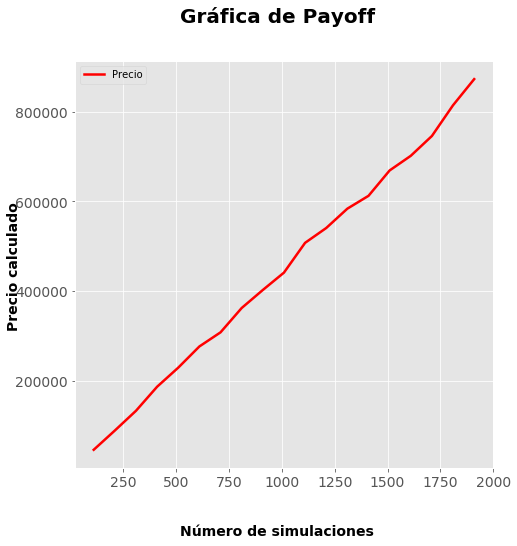

In [820]:
K = 110
stock_prices = np.array(range(K+1, 1_000))
sim_array = np.array(range(K, 2_001, 100))

do_payoff(stock_prices=stock_prices, sim_array=sim_array)

# Volatilidad implícita

Utilizando los valores

* $S_0=100$
* $K=110$
* $T = 1$
* $r = 0.01$
* $t = 0$

y el precio de la opción call observado en el mercado $P_{mercado} = 10$, calcule la volatilidad implícita resolviendo el siguiente problema de optimización

$$
VolImp = argmin_{\sigma > 0} \left( P_{mercado} - P_{BS} \right)^2
$$

en donde $P_{BS}$ es el precio de la opción call utilizando la fórmula analítica de Black-Scholes.

Como solución inicial utilice $\sigma_0 = 0.05$

**Solución**

La volatilidad implícita es 0.3379

In [847]:
def black_scholes_call(S=100, K=110, T=1, r=0.01, t=0, sigma=0.05):
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    d1 = ((np.log(S / K) + (r + 0.5*(sigma**2)) * (T-t))) / (sigma * np.sqrt(T-t))
    d2 = ((np.log(S / K) + (r - 0.5*(sigma**2)) * (T-t))) / (sigma * np.sqrt(T-t))
    return (S*norm.cdf(d1, 0.0, 1.0) - np.exp(-r * (T-t))*K*norm.cdf(d2, 0.0, 1.0))

def vol_impl(params, *args):
     return (10 - black_scholes_call())**2

def do_it(S=100, K=110, T=1, r=0.01, t=0, sig=0.05, p_m=10):
    np.random.seed(54321)
    
    data = norm.rvs(size=10, loc=1, scale=0.05)
    
    result = minimize(
        vol_impl, 
        x0=np.array([0, 0.5]),
        bounds=Bounds(lb=[-np.inf, 0.05], ub=[np.inf, 0.05]),
        method='L-BFGS-B', 
        args=data)
    
    return result.x

In [848]:
for i in do_it():
    print(i)

0.0
0.05
